# SIT742: Modern Data Science 
**(Week 05: Text Analysis)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.
- If you found any issue/bug for this document, please submit an issue at [tulip-lab/sit742](https://github.com/tulip-lab/sit742/issues)

Prepared by **SIT742 Teaching Team**

---

## Session 5B - Exploring Pre-Processed text and Generating Features

### Table of Content

* Part 1. Counting Vocabulary by Selecting Tokens of Interest
* Part 2. Building Vector Representation 
* Part 3. Saving Pre-processed Text to a File
* Part 4. Extracting Other Features
* Part 5. Summary
* Part 6. Reading Materials
* Part 7. Exercises


---

One of the challenges of text analysis is to convert unstructured and semi-structured text into a structured representation. This must be done prior to carrying out any text analysis tasks. This chapter will show you 
how to put some of those basic steps discussed in the previous chapter together to generate different vector
representations for some given text. You will learn how to compute some basic statistics for text, and how to extract features rather than unigrams.


## Part 1. Counting Vocabulary by Selecting Tokens of Interest

Two important concepts that should be mentioned first are **type** and **token**.
Here are the definitions of the two terms, quoted from "[tokenization](http://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)",  
>a **token** is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing;

> a **type** is the class of all tokens containing the same character sequence. 

A *type* is also a vocabulary entry. In other words, a vocabulary consists of a number of word types.
The distinction between a type and its tokens is a distinction that separates a descriptive concept from
its particular concrete instances. 
This is quite similar to the distinction in object-oriented programming between classes and objects.
In this section, you are going to learn how to count types in a given corpus by further processing the text.

The document collection that we are going to use is a set of Gutenberg books that comes with NLTK.
It contains 18 books of 12 authors in total.
Although this collection has already been pre-processed (e.g., you can access the text at different levels, like raw text, tokens, and sentences),
we would still like to demonstrate how to put some of the basis text preprocessing steps together and process the raw Gutenberg books step by step.
First, import the main Python libraries.

In [2]:
#matplotlib package is used for Data virtualization
import matplotlib.pyplot as plt
%matplotlib inline 

#nltk.tokenize.punkt module. 
#This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. 
#It must be trained on a large collection of plaintext in the target language before it can be used.
import nltk
from nltk.corpus import gutenberg
nltk.download('punkt')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

Since the tokenizer works on a per document level, we can parallelize the process of tokenization with Python's multi-processing module. Please refer to its official documentation [here](https://docs.python.org/2/library/multiprocessing.html).
In the following code, we wrap tokenization in a Python function, and then
create a pool of four worker processes with the Python Pool class.
The <font color="blue">Pool.map()</font>, a parallel equivalent of the  built-in  <font color="blue">map()</font> function, takes one iterable argument.
The iterable will be split into a number of chunks, each of which will be submitted to a process in the process pool.
Each process will apply a callable function to each element in the chunk it has received.
Note that you can replace the NLTK tokenizer with the one you implement.

In [3]:
#Please recall how to define a function using Python programming language
def tokenizeRawData(fileid):
    """
        This function tokenizes a raw text document.
    """
    #cover all words to lowercase
    raw_article = gutenberg.raw(fileid).lower()
    #Tokenize each gutenberg books
    #Return a tokenized copy of text, using NLTK’s recommended word tokenizer 
    #(currently an improved TreebankWordTokenizer along with PunktSentenceTokenizer for the specified language).
    tokenised_article = nltk.tokenize.word_tokenize(raw_article) 
    return (fileid, tokenised_article) 

In [4]:
#To download the 'retuers'  
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [5]:
#The gutenberg can be grouped into 19 books.
#This fileids is automatically detect the topic of a document,
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
#We run the above own defined function tokenizeRawData
tokenized_gutenberg =  dict(tokenizeRawData(fileid) for fileid in gutenberg.fileids())
tokenized_gutenberg

#You can compare the tokenized_gutenberg results with the raw text document from the gutenberg.words('test/14826')[:14]
#tokenized_gutenberg will show the tokenized results of the raw text document
#In the raw text document, 'U',',''S' are three tokens but after the tokenization, you will find they are one token u.s.-japan.

### 1.1. Removing Words with Non-alphabetic Characters
The NLTK's built-in  <font color="blue">word_tokenize</font> function tokenizes a string to split off punctuation other than periods.
Not only does it return words with alphanumerical characters, but also punctuations. 
Let's take a look at one Gutenberg book,

In [9]:
# To print all key and vaule in the tokenized_reruers dictionary
for key, value in tokenized_gutenberg.items() :
    print (key, value)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#To chose one key from the above dictionary content and show its related values
tokenized_gutenberg['austen-emma.txt']

Let's Assume that we are interested in words containing alphabetic characters only 
and would like to remove all the other tokens
that contain digits, punctuation and the other symbols.
Removing all the non-alphabetic words from the vocabulary is
usually required in some text analysis tasks, such as Topic Modelling that
learns the semantic meaning of documents.
It can be easily done with the  <font color="blue">isalpha()</font> function.
 <font color="blue">isalpha()</font>
checks whether the string consists of alphabetic characters only or not.
This method returns true if all characters in the string are in the alphabet and there 
is at least one character, false otherwise.
If you would like to keep all words with alphanumeric characters, you can use
 <font color="blue">isalnum()</font>. Refer to Python's [built-in types](https://docs.python.org/2/library/stdtypes.html) for more detail.
Indeed, you can construct your tokenizer in a way such that the tokenizer only extracts words with either 
alphabetic or alphanumerical characters, as we discussed in the previous chapter.
We will leave this as a simple exercise for you to do on your own.

In [11]:
for k, v in tokenized_gutenberg.items():
    #For the v in the each k, we will  only keep alphabetic characters
    tokenized_gutenberg[k] = [word for word in v if word.isalpha()]

tokenized_gutenberg['austen-emma.txt']
#You will find the ',' and numbers which are deleted, only keep the alpha in the result.

['emma',
 'by',
 'jane',
 'austen',
 'volume',
 'i',
 'chapter',
 'i',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'by',
 'a

In [ ]:
for k, v in tokenized_gutenberg.items():
    #For the v in the each k, we will  keep alphabetic characters and alphanumberic characters
    tokenized_gutenberg[k] = [word for word in v if word.isalnum()]

tokenized_gutenberg['austen-emma.txt']
#You will find the ',' and numbers which are not deleted comparing with above sample

Now you should have derived much cleaner text for each Gutenberg book.
Let's check how many types we have in the whole corpus and the lexical diversity (i.e., the average number 
of times a type apprearing in the collection.)

In [13]:
from __future__ import division
from itertools import chain

words = list(chain.from_iterable(tokenized_gutenberg.values()))

#Convert the words type from list to set
#because the set will automaticlly delete all repeated elements in the list.
vocab = set(words)

lexical_diversity = len(words)/len(vocab)


print ("Total number of tokens: ", len(words), "\nVocabulary size (Type): ",len(vocab),
"\nLexical diversity: ", lexical_diversity, "\nThe Lexical diversity means that words occure on averge about", round(lexical_diversity),"times each.")

Total number of tokens:  2092405 
Vocabulary size (Type):  40753 
Lexical diversity:  51.34358206757785 
The Lexical diversity means that words occure on averge about 51 times each.


There are about 2.09 million word tokens in the tokenized Gutenberg corpus.
The vocabulary size is 40,753, which is still quite large according to our knowledge of this corpus.
The lexical diversity tells us that words occur on average about 51 times each.
You might think that
there could still be words that occur very frequently, such as stopwords,
and those that only occur once or twice.
For example, if an article "the" appears in almost
every document in a corpus,
it might not help you at all and would only contribute noise.
Similarly if a word appears only once in a corpus or only in one document of the corpus,
it could carry little useful information for downstream analysis.
Therefore, we would better remove those words from the vocabulary, which
will benefit the text analysis algorithms in terms of reducing running time and
memory requirement, and improving their performance.
To do so, we need to further explore the corpus by computing some simple
statistics.

Note that we introduced two new Python libraries in the code above.
They are
[`__future__`](https://docs.python.org/3.8/library/__future__.html) 
and [`itertools`](https://docs.python.org/3.8/library/itertools.html). 

The first statement in the code makes sure that Python switches to 
always yielding a real result.
Thus if you divide two integer values, you will not get for example. 
````
    1/2 = 0
    3/2 = 1
````
Instead, you will have
```
    1/2 = 0.5
    3/2 = 1.5
```
The second statement imported a  [chain](https://docs.python.org/3.8/library/itertools.html) iterator from the  <font color="blue">itertools</font> module.
We use the iterator to join all the words in all the Gutenberg books together.
It works as
```python
   for wordList in tokenized_gutenberg.values():
       for word in wordList:
           yield word
```

### 1.2. Removing the Most and Less Frequent Words
It is quite useful for us to identify the words that are most informative about the sematic 
meaning of the text regardless of syntax.
One common statistics often used in text processing is frequency distribution.
It can tell us how frequent a word is in a given corpus in terms of either term frequency or document frequency.
Term frequency counts the number of times a word occurs in the whole corpus regardless which document it is in.
Frequency distribution based on term frequency tells us how the total number of word tokens are distributed across all the types.
NLTK provides a built-in function `FreqDist` to compute this distribution directly from a set of word tokens.

In [14]:
from nltk.probability import *
fd_1 = FreqDist(words)

What are the most frequent words in the corpus?
we can use the  <font color="blue">most_common</font> function to print out the most frequent words together with their frequencies.

In [15]:
fd_1.most_common(25)

[('the', 133505),
 ('and', 95294),
 ('of', 71206),
 ('to', 47689),
 ('a', 33804),
 ('in', 33476),
 ('i', 29904),
 ('that', 28742),
 ('he', 25825),
 ('it', 22174),
 ('his', 21395),
 ('for', 19502),
 ('was', 18774),
 ('not', 18167),
 ('with', 17591),
 ('is', 16625),
 ('you', 16269),
 ('be', 16088),
 ('as', 14518),
 ('but', 13893),
 ('all', 13666),
 ('they', 13081),
 ('him', 12996),
 ('shall', 11678),
 ('her', 11528)]

The list above contains the 25 most frequent words.
You can see that it is mostly dominated by the little words of the English language which have important grammatical roles.
Those words are articles, prepositions, pronouns, auxiliary webs, conjunctions, etc.
They are usually referred to as function words in linguistics, which tell us nothing about 
the meaning of the text.
What proportion of the text is taken up with such words?
We can generate a cumulative frequency plot for them
using  <font color="blue">fd.plot(25, cumulative=True)</font>.
If you set  <font color="blue">cumulative</font> to  <font color="blue">False</font>, 
it will plot the frequencies of these 25 words.

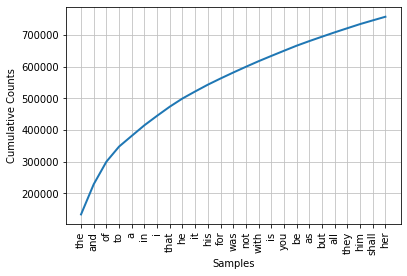

In [16]:
fd_1.plot(25, cumulative=True)

What are the most frequent words in terms of **Document Frequency**?
Here we are going to count how many documents a word appears in, which is referred to as document frequency.
Instead of writing nested FOR loops to count the document frequency for each word,
we can use  <font color="blue">FreqDist()</font> jointly with  <font color="blue">set()</font> as follows:
1. Apply  <font color="blue">set()</font> to each Gutenberg article to generate a set of unique words in the article and save all sets in a list
```python
    [set(value) for value in tokenized_gutenberg.values()]
```
2. Similar to what we have done before, we put all the words in a list using  <font color="blue">chain.from_iterable</font> and past
it to  <font color="blue">FreqDist</font>.

The first step makes sure that each word in an article appears only once, thus the total number of 
times a word appears in all the sets is equal to the number of documents containing that word.

In [17]:
words_2 = list(chain.from_iterable([set(value) for value in tokenized_gutenberg.values()]))
fd_2 = FreqDist(words_2)
fd_2.most_common(25)

[('at', 18),
 ('place', 18),
 ('where', 18),
 ('after', 18),
 ('said', 18),
 ('as', 18),
 ('age', 18),
 ('both', 18),
 ('home', 18),
 ('might', 18),
 ('day', 18),
 ('the', 18),
 ('it', 18),
 ('back', 18),
 ('close', 18),
 ('death', 18),
 ('made', 18),
 ('on', 18),
 ('friend', 18),
 ('long', 18),
 ('set', 18),
 ('make', 18),
 ('many', 18),
 ('next', 18),
 ('let', 18)]

What you will find is that the majority of the most frequent words according to their document frequecy are still functional words.
Therefore, the next step is to remove all the stopwords.

#### 1.2.1 Ignoring Stopwords

We often remove function words from the text completely for most text analysis tasks.
Instead of using the built-in stopword list of NLTK, we use a much rich stopword list.

Stop Words also named common words. Most Search Engines do not consider extremely common words in order to save disk space or to speed up search results.


In [18]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=986c94afdc3f00f0b21c7d3119973be7aa354cdec8c569f013b4a77e93216e21
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [19]:
import wget

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Jupyter/data/stopwords_en.txt'

DataSet = wget.download(link_to_data)


In [20]:
!ls

sample_data  stopwords_en.txt


In [21]:
stopwords = []
with open('stopwords_en.txt') as f:
    stopwords = f.read().splitlines()
stopwords[:20]  

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along']

In [30]:
tokenized_gutenberg_1 = {}
for fileid in gutenberg.fileids():
    tokenized_gutenberg_1[fileid] = [w for w in tokenized_gutenberg[fileid] if w not in stopwords]
tokenized_gutenberg_1
print(len(tokenized_gutenberg_1))

18


The list comprehension 
```python
    [w for w in tokenized_gutenberg[fileid] if w not in stopwords]
```
says: For each word in each Gutenberg Book, keep the word if the word is not contained in the stopword list.

Checking for membership of a value in a list takes time proportional to the list's length in the average and worst cases. 
It causes the above code to run quite slow as we need to do the check for every word in each Gutenberg Book
and the size of the stopword list is large.
However, if you have hashable items, which means both the item order and duplicates are disregarded, 
Python `set` is better choice than `list`, [Why [Click here]?](https://stackoverflow.com/questions/3489071/in-python-when-to-use-a-dictionary-list-or-set) The former runs much faster than the latter in terms of searching
a large number of hashable items. Indeed, `set` takes constant time to check the membership.
Let's try converting the stopword list into a stopword set, then search to remove all the stopwords.
Please also note that if you try to perform iteration, `list` is much better than `set`.

In [31]:
#Convert the list stopwords to set stopwordsSet
stopwordsSet = set(stopwords)

#The length of stopwords list
print(len(stopwords))

#The length of stopwordsSet set
print(len(stopwordsSet))

#To delete all stopswords in the gutenberg
for fileid in gutenberg.fileids():
    tokenized_gutenberg[fileid] = [w for w in tokenized_gutenberg[fileid] if w not in tokenized_gutenberg]

#The length of processed tokenized_gutenberg
print(len(tokenized_gutenberg))

571
570
18


In the above stopping process, stopwords have been removed from the vocabulary. You might wonder what those removed words are. It is quite easy to check those words by differentiating the vocabulary before and after stopping. 

In [32]:
#To combine all tokenized_gutenberg without stopwords in a list using the chain method
words_3 = list(chain.from_iterable(tokenized_gutenberg.values()))
fd_3 = FreqDist(words_3)

[]

Beside stopwords, there might some other words that occur quite often as well.

In [33]:
fd_3.most_common(10)

[('the', 133505),
 ('and', 95294),
 ('of', 71206),
 ('to', 47689),
 ('a', 33804),
 ('in', 33476),
 ('i', 29904),
 ('that', 28742),
 ('he', 25825),
 ('it', 22174)]

Before we decide to remove those words from our vocabulary, it might be worth checking what 
those words mean and the context of those words. Fortunately NLTK provides a `concordance`
function in the `nltk.text` module. A concordance view shows us every occurrence of a given 
word, together with the corresponding context. For example,

In [36]:
nltk.Text(gutenberg.words()).concordance('the')

Displaying 25 of 133583 matches:
disposition , seemed to unite some of the best blessings of existence ; and had
ad lived nearly twenty - one years in the world with very little to distress or
ttle to distress or vex her . She was the youngest of the two daughters of a mo
 or vex her . She was the youngest of the two daughters of a most affectionate 
 of Emma . Between _them_ it was more the intimacy of sisters . Even before Mis
before Miss Taylor had ceased to hold the nominal office of governess , the mil
old the nominal office of governess , the mildness of her temper had hardly all
wed her to impose any restraint ; and the shadow of authority being now long pa
t , but directed chiefly by her own . The real evils , indeed , of Emma ' s sit
, indeed , of Emma ' s situation were the power of having rather too much her o
ttle too well of herself ; these were the disadvantages which threatened alloy 
atened alloy to her many enjoyments . The danger , however , was at present so 
 a gent

In [37]:
nltk.Text(gutenberg.words()).concordance('and')

Displaying 25 of 95442 matches:
                                      and rich , with a comfortable home and ha
 , and rich , with a comfortable home and happy disposition , seemed to unite s
 of the best blessings of existence ; and had lived nearly twenty - one years i
ost affectionate , indulgent father ; and had , in consequence of her sister ' 
istinct remembrance of her caresses ; and her place had been supplied by an exc
allowed her to impose any restraint ; and the shadow of authority being now lon
ey had been living together as friend and friend very mutually attached , and E
d and friend very mutually attached , and Emma doing just what she liked ; high
 having rather too much her own way , and a disposition to think a little too w
 any continuance . The wedding over , and the bride - people gone , her father 
 the bride - people gone , her father and herself were left to dine together , 
lf to sleep after dinner , as usual , and she had then only to sit and think of
 usual ,

After reviewing those words, you might also want to remove them from the vocabulary. 
We will leave it as an excersie for you to do on your own.

#### 1.2.2 Remove Less Frequent Words

If the most common words do not benefit the downstream text analysis tasks, except for contributing noises,
how about the words that occur once or twice?
Here another interesting statistic to look at is the frequency of the frequencies of word types in a given corpus.
We would like to see how many words appear only once, how many words appear twice, how many
words appear three times, and so on.

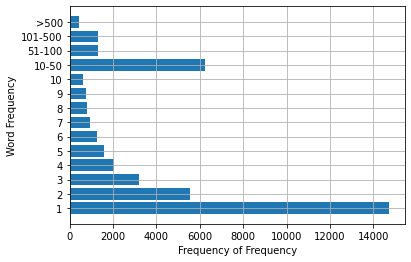

In [38]:
#we have defined fd_3 = FreqDist(words_3), it means that ffd will show FreqDist about the processed tokenized_gutenberg
ffd = FreqDist(fd_3.values())

#Import pylab package for data virtualization
from pylab import *

#To create a list include 14 element, '0'.
y = [0]*14

#For top 10 Freq, we will show each of them 
#For therest Freq, we will catagorize them by 10-50, 51-100, 101-500 and > 500.
#You can add a new code cell to run the command 'ffd'. Then, you can understand the below statements block deeply.
for k, v in ffd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 50:
        y[10] =  y[10] + v
     elif k >50 and k <= 100:
        y[11] =  y[11] + v
     elif k > 100 and k <= 500:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
                
#covert a integer list to a string list
ytks =list(map(str, range(1, 11))) 

#append is uedd to add its argument as a single element to the end of a list. 
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')

# generate integer from 1 to 14        
x = range(1, 15)

#Center the bars on the y positions
barh(x,y, align='center')

#x, A list of positions at which ticks should be placed
#ytks, A list of explicit labels to place at the given locs.
yticks(x, ytks)

#To define x axial and y axial lables.
xlabel('Frequency of Frequency')
ylabel('Word Frequency')

#To show the grid line on the diagram
grid(True)

The horizontal bar chart generated above shows how many word types occur with a certain frequency.
Similarly, you can also look at the bar chart based on the document frequency. Try it by yourself!

Let's further remove those words that occur only once. 
To get those words, you can write the code like
```python
    lessFreqWords = set([k for k, v in fdist.items() if v < 2])
```
or choose to use `hapaxes()` function.

In [39]:
lessFreqWords = set(fd_3.hapaxes())

#You also can use  "lessFreqWords = set([k for k, v in fdist.items() if v < 2])" to replace "lessFreqWords = set(fd_3.hapaxes())"

#You can uncomment below codes for using the mp.pool parallelizing the execution of a function.
#pool = mp.Pool(4)
#tokenized_gutenberg = dict(pool.map(removeLessFreqWords, gutenberg.fileids()))

In [41]:
#To define a function for removing LessFreqWords
def removeLessFreqWords(fileid):
    return (fileid, [w for w in tokenized_gutenberg[fileid] if w not in lessFreqWords])

tokenized_gutenberg = dict(removeLessFreqWords(fileid) for fileid in gutenberg.fileids())

Now, you should have a pretty clean set of Gutenberg books, each of which is stored as a list of word tokens.
Let's further print out some statistics that summarize this corpus.

In [42]:
import numpy as np

words = list(chain.from_iterable(tokenized_gutenberg.values()))
vocab = set(words)

print ("Vocabulary size: ",len(vocab))
print ("Total number of tokens: ", len(words))
print ("Lexical diversity: ", lexical_diversity)
print ("Total number of books:", len(tokenized_gutenberg))

lens = [len(value) for value in tokenized_gutenberg.values()]
print('The lens list for each article are', lens)

#For mean,max, min and std,you can check those concepts on https://www.ucd.ie/t4cms/Mean%20and%20Standard%20Deviation.pdf
print ("Average document length:", np.mean(lens))
print ("Maximun document length:", np.max(lens))
print ("Minimun document length:", np.min(lens))
print ("Standard deviation of document length:", np.std(lens))

Vocabulary size:  26046
Total number of tokens:  2077698
Lexical diversity:  51.34358206757785
Total number of articles: 18
The lens list for each article are [156509, 82709, 117997, 787481, 6731, 45508, 15709, 25208, 80402, 70496, 57094, 163940, 207239, 77933, 19814, 28161, 16730, 118037]
Average document length: 115427.66666666667
Maximun document length: 787481
Minimun document length: 6731
Standard deviation of document length: 172328.8467784776


## Part 2. Building Vector Representation

After text pre-processing has been completed, each individual document needs to be transformed into 
some kind of numeric representation that can be input into most NLP and text mining algorithms.
For example, classification algorithms, such as Support Vector Machine, can only take data in a 
structured and numerical form. They do not accept free languge text.
The most popular structured representation of text is the vector-space model, which represents text
as a vector where the elements of the vector indicate the occurence of words within the text.
The vector-space model makes an implicit assumption that 
the order of words in a text document are not as
important as words themselves, and thus disregarded.
This assumpiton is called [**Bag-of-words**](https://en.wikipedia.org/wiki/Bag-of-words_model).

Given a set of documents and a pre-defined list of words appearing 
in those documents (i.e., a vocabulary), you can compute a vector representation for each document.
This vector representation can take one of the following three forms:
* a binary representation,
* an integer count,
* and a float-valued weighted vector.

To highlight the difference among the three approaches, we use a very simple example as follows:
```
    document_1: "Data analysis is important."
    document_2: "Data wrangling is as important as data analysis."
    document_3: "Data science contains data analysis and data wrangling."
```
The three documents contain 20 tokens and 9 unique words.
Those unique words are sorted alphabetically with total counts:
```
     'analysis': 3,
     'and': 1,
     'as': 2,
     'contains': 1,
     'data': 6,
     'important': 2,
     'is': 2,
     'science': 1,
     'wrangling': 2
```
Given the vocabulary above, 
both the binary and the integer count vectors are easy to compute.
A binary vector stores 1s for the word that appears in a document and 0s for the other words in
the vocabulary,
whereas a count vector stores the frequency of each word appearing in the document.
Thus, the binary vector representations for the three documents above are
**Binary vector Table and Count vector Table.**
   
   ||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|1|0|0|0|1|1|1|0|0|
   |document 2:|1|0|1|0|1|1|1|0|1|
   |document 3:|1|1|0|1|1|0|0|1|1|

The count vector representations for the same documents would look as follows:

   ||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|1|0|0|0|1|1|1|0|0|
   |document 2:|1|0|2|0|2|1|1|0|1|
   |document 3:|1|1|0|1|3|0|0|1|1|

Instead of using the two vector representations above, 
most existing text analysis algorithms, like document classification and information retrieval, 
prefer representing documents as weighted vectors.
The raw term frequency is often replaced with a weighted term frequency
that indicates how important a word is in a particular document.
There are many different term weighting schemes online.
To store each document as a weighted vector, we first need to choose a **weighting scheme**. 

**The most popular scheme is the TF-IDF weighting approach**. 
TF-IDF stands for term frequency-inverse document frequency. 
The **term frequency (TF)** for a word is the number of times the word appears in a document. 
In the preceding example, the term frequency in "document _2" ("Data wrangling is as important as data analysis.") for “data” is 2, since it appears twice in the document. 

Moreover, the **Document frequency** for a word is the number of documents that contain the word; 
it would also be 3 for “data” in the collection of the three preceding documents (document_1. document_2 and document_3). 
The Wikipidia entry on [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) lists 
a number of variants of TF-IDF. 
One variant is reproduced here
$$tf\cdot idf(w,d) = tf(w, d) * idf(w)$$

where 

$$tf(w,d)\,=\, \sum_{i}^{|d|} 1_{w = w_{d,i}}$$
and
$$idf(w) = log\left(\frac{|D|}{|d \in D: w \in d |}\right)$$

The assumption behind TF-IDF is that words with high term frequency should receive high weight unless they also have high document frequency. 
Stopwords are the most commonly occurring words in the English language. They often occur many times within a single document, but they also occur in nearly every document. 
These two competing effects cancel out to give them low weights,
as those very common words carry very little meaningful information about the actual contents of the document.
Therefore, the TF-IDF weights for stopwords are almost always 0.
With the TF-DF formulas above,
the weighted vector representations for the example documents are computed as

||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|0|0|0|0|0|0.176|0.176|0|0|
   |document 2:|0|0|0.954|0|0|0.176|0.176|0|0.176|
   |document 3:|0|0.477|0|0.477|0|0|0|0.477|0.176|

[link text](https://)Given the cleaned up Gutenberg documents, how can we generate those vectors for each documents? 
Unfortunately, NLTK does not implement methods that directly produce those vectors.
Therefore, we will either write our own code to compute them or appeal to other data analysis libraries.
Here we are going to use [scikit-learn](http://scikit-learn.org/stable/index.html), an open source machine 
learning library for Python.
If you use Anaconda, you should already have scikit-learn installed, otherwise you will need to 
[install it](http://scikit-learn.org/stable/install.html) by following the instruction on its official website.

Although scikit-learn features various classification, regression and clustering algorithms
we are particularly interested in its feature extraction module, [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction).
This module is often used to "extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image." Please refer to its documentation on text feature extraction,
section 4.2.3 of [Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). We will demonstrate the usage of the following two classes:
* [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer): It converts a collection of text documents to a matrix of token counts. 
* [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer):
It converts a collection of raw documents to a matrix of TF-IDF features.


### 2.1 Creating Count Vectors
Let's start with generating the count vector representation for each Gutenberg document.
Initialise the "CountVector" object: since we have pre-processed all the Gutenberg documents, 
the parameters, "tokenizer", "preprocessor" and "stop_words" are set to their default value, i.e., None.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word") 

Next, transform Gutenberg books into feature vectors. `fit_transform` does two things: First, it fits the model and learns the vocabulary; second it transforms the text data into feature vectors. 
Please note the input to `fit_transform` should be a list of strings. 
Since we have stored each tokenised article as a list of words, we concatenate all the words in the list and separate
them with white spaces. 
The following code will do that:
```python
[' '.join(value) for value in tokenized_gutenberg.values()]
```
Then, we input this list of strings into `fit_transform`,

In [44]:
data_features = vectorizer.fit_transform([' '.join(value) for value in tokenized_gutenberg.values()])
print (data_features.shape)

(18, 26027)


The shape of document-by-word matrix should be 10788 * 17403. 
However, in order to save such a matrix in memory but also to speed up algebraic operations on the matrix,
scikit-learn implements matrix/vector in a sparse representation.
Let's check the count vector for the first article, i.e., 'training/1684'.

In [45]:
vocab2 = vectorizer.get_feature_names()
for word, count in zip(vocab, data_features.toarray()[0]):
    if count > 0:
        print (word, ":", count)

Streaming output truncated to the last 5000 lines.
contingency : 30
burs : 41
erased : 8
mastery : 2
plumping : 1
idler : 1
unsettled : 2
glade : 3
blistered : 1
leyden : 1
dixon : 1
vanish : 2
assistant : 1
windpipe : 3
climax : 3
lashes : 4
graving : 3
protecting : 1
temples : 1
malefactors : 3
goodliest : 6
trumpeted : 6
formulate : 1
dye : 1
bushy : 3
fleeting : 25
reversing : 8
clapper : 11
readinesse : 3
douceurs : 1
horseponds : 7
overlooked : 3
headsman : 2
abatement : 1
iot : 1
coloured : 1
reuenge : 6
talke : 1
careys : 1
exaggeration : 1
firemen : 1
abijam : 8
counsell : 5
moist : 2
jahaziel : 1
kohathites : 7
collation : 2
hovered : 2
shaaraim : 1
e : 20
heroic : 10
cousinly : 2
overlook : 6
unremitting : 4
tread : 4
rival : 1
foreskin : 2
diverse : 18
furrow : 1
cupboard : 1
unequalled : 12
watchman : 2
equanimity : 2
custome : 2
pitchy : 5
buriall : 1
gasps : 2
gallied : 1
scalded : 2
sharkish : 1
jam : 1
cessation : 1
fornications : 2
shipmen : 1
uttermost : 2
vacuum : 4

Another way to get the count list above is to use `FreqDist`.

In [47]:
FreqDist(tokenized_gutenberg['austen-emma.txt'])

FreqDist({'emma': 855,
          'by': 569,
          'jane': 299,
          'austen': 1,
          'volume': 3,
          'i': 3164,
          'chapter': 56,
          'woodhouse': 308,
          'handsome': 38,
          'clever': 27,
          'and': 4875,
          'rich': 14,
          'with': 1215,
          'a': 3124,
          'comfortable': 34,
          'home': 128,
          'happy': 123,
          'disposition': 24,
          'seemed': 141,
          'to': 5179,
          'unite': 3,
          'some': 261,
          'of': 4284,
          'the': 5198,
          'best': 83,
          'blessings': 6,
          'existence': 6,
          'had': 1623,
          'lived': 25,
          'nearly': 14,
          'years': 56,
          'in': 2173,
          'world': 80,
          'very': 1202,
          'little': 359,
          'distress': 19,
          'or': 494,
          'vex': 1,
          'her': 2448,
          'she': 2336,
          'was': 2396,
          'youngest': 4,
         

### 2.2 Creating TF-IDF Vectors
Similar to the use of `CountVector`, we first initialise a `TfidfVectorizer` object by only specifying 
the value of "analyzer", and then covert the Gutenberg data into a list of strings, each of which corresponds
to a Gutenberg books.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = "word")
tfs = tfidf.fit_transform([' '.join(value) for value in tokenized_gutenberg.values()])
tfs.shape

(18, 26027)

Let's print out the weighted vector for the first document.

In [50]:
vocab = tfidf.get_feature_names()
for word, weight in zip(vocab, tfs.toarray()[0]):
    if weight > 0:
        print (word, ":", weight)

Streaming output truncated to the last 5000 lines.
delighted : 0.0029211517516392173
delightful : 0.004475694977240269
delightfully : 0.0013185344973666829
delights : 0.00021832658425562288
delineated : 0.00020087360549903306
deliver : 0.00012332769864282033
delivered : 0.00021832658425562288
delusion : 0.000394924357936348
demand : 0.00010916329212781144
demanded : 0.00010916329212781144
demanding : 0.0001410668095631251
demands : 0.00024665539728564067
demerits : 0.0001805674725487148
demure : 0.0005417024176461445
denial : 0.0004232004286893754
denied : 0.0004120862627700083
denote : 0.0004558427567873026
denoted : 0.00016481681217083536
denotes : 0.00020087360549903306
dentist : 0.0006884804773559409
deny : 0.0004962925964531029
denying : 0.000789848715872696
depart : 0.00010916329212781144
departed : 0.00012332769864282033
departure : 0.000394924357936348
depend : 0.002897269806689247
depended : 0.0010531316211635944
dependence : 0.0016714234415534431
dependent : 0.000494450436512

So now we have converted all the Gutenberg books into feature vectors. 
We can use those vectors to, for example,
* compute the similarity between two books, 
* search books for a given query
* do other advance text analysis, such as document classification and clustering.

Assume that we have a new document, how can we get its TF-IDF vector.
We do this by using the transform function as follows.

In [51]:
str = """
the former secretary of state hoped to win enough states to take a big step toward wrapping up her nomination fight
with a democratic senator from Vermont.
"""
response = tfidf.transform([str])
for col in response.nonzero()[1]:
    print (vocab[col], ' - ', response[0, col])

wrapping  -  0.31094701746383113
with  -  0.13316782672779603
win  -  0.2059498643165866
vermont  -  0.3406625592406669
up  -  0.1560527519653326
toward  -  0.218642113826164
to  -  0.26633565345559207
the  -  0.13316782672779603
take  -  0.13316782672779603
step  -  0.1646472065654489
states  -  0.2661397409587435
state  -  0.1560527519653326
secretary  -  0.3406625592406669
of  -  0.13316782672779603
hoped  -  0.19436274834228462
her  -  0.13316782672779603
from  -  0.13316782672779603
former  -  0.1560527519653326
fight  -  0.1560527519653326
enough  -  0.14036784108156952
democratic  -  0.31094701746383113
big  -  0.23267274471923666


Note that the text above is not included in the trained TF-IDF model with the 'transform' function, unless the `fit_transform` function is called,

Both `CountVectorizer` and `TfidfVectorizer` come with their own options to automatically do pre-processing, tokenization, and stop word removal -- for each of these, instead of using their default value (i.e., None),
we could customise the two vectorizer classes by either using a built-in method or specifying our own function.
See the function documentation for more details.
However, we wanted to write our own function for clean the text data in this chapter to show you how 
it's done step by step.

## Part 3. Extracting Other Features

It is common for most text analysis tasks to treat documents as bags-of-words, which can significantly simplify the inference procedure of text analysis algorithms. 
However, things always have pros and cons. 
The bag-of-words representation loses lots of information encoded in either syntax or word order (i.e., dependencies between adjacent words in sentences.). 
For example, representing a document as a collection of unigrams effectively disregards any word order dependence,
which fails to capture phrases and multi-word expressions. A similar issue has been mentioned in section 2.1 Creating Count Vectors. 

In this section, we are going to show you how to
* use Part-of-Speeching (POS) tagging to extract specific word groups, such as all nouns, verbs, etc.,
* extract n-grams,
*  and extract collocations

These features can be further used to enrich the representation of a document.

### 3.1 Extracting Nouns and Verbs

It is easy for human to tell the difference between nouns, verbs, 
adjectives and adverbs, as we have learnt them back in elementary school.
However, how can we automatically classify words into their parts of speech (i.e., lexical categories or word classes) 
and label them accordingly with computer program? 
This section is not going to discuss how to determine the category of a word from a linguistic perspective.
Instead it demonstrates the use of some existing POS taggers to extract words in a specific lexical category.
It has been proven that words together with their part-of-speech (POS) are quite useful for many language processing tasks. 

In NLP, the process of labelling words with their corresponding part-of-speech (POS) tags is known as [POS tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging).
A POS tagger processes a sequence of words and attaches a POS tag to each word based on both its definition and its context. There are many POS taggers available online, such as [Sandford POS tagger](http://nlp.stanford.edu/software/tagger.shtml). 
We are going to use the one implemented by NLTK.

In [55]:
nltk.download('averaged_perceptron_tagger')

example_sent = 'A POS tagger processes a sequence of words and attaches a POS tag to each \
word based on both its definition and its context'

text = nltk.word_tokenize(example_sent)

tagged_sent = nltk.tag.pos_tag(text)

print (tagged_sent)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('A', 'DT'), ('POS', 'NNP'), ('tagger', 'NN'), ('processes', 'VBZ'), ('a', 'DT'), ('sequence', 'NN'), ('of', 'IN'), ('words', 'NNS'), ('and', 'CC'), ('attaches', 'VBZ'), ('a', 'DT'), ('POS', 'NNP'), ('tag', 'NN'), ('to', 'TO'), ('each', 'DT'), ('word', 'NN'), ('based', 'VBN'), ('on', 'IN'), ('both', 'DT'), ('its', 'PRP$'), ('definition', 'NN'), ('and', 'CC'), ('its', 'PRP$'), ('context', 'NN')]


If you are seeing these tags for the first time, you will wonder what these tags mean. 
You can find the specification of all the tags [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). 
NLTK provides documentation for each tag, which can be queried using the tag, e.g., 

In [56]:
nltk.download('tagsets')
print ('\n\n', nltk.help.upenn_tagset('NNP'))
print ('\n\n', nltk.help.upenn_tagset('IN'))
print ('\n\n', nltk.help.upenn_tagset('PRP$'))

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


 None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


 None
PRP$: pronoun, possessive
    her his mine my our ours their thy your


 None


The example sentence has been processed by `pos_tag` into a list of tuples, each of which is a pair of a word and its POS tag. We see that 'a' is 'DT', a determiner; 'its' is 'PRP$', a possessive pronoun; 'and' is 'CC', a coordinating conjunction, 'words' is 'NNS', a noun in the plural form, and so on. Note that several of the corpora included in NLTK have been tagged for their POS. Please click [here](http://www.nltk.org/howto/corpus.html#tagged-corpora) to see how to access those tagged corpora.
Here is an example of using the `tagged_words` function to retrieve all words in Brown corpus with their tags.

In [57]:
nltk.download('brown')
nltk.corpus.brown.tagged_words()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

Please note that the collection of tags is known as a tag set. 
There are many different conventions for tagging words.
Therefore, tag sets can vary among different tasks.
What we used above is the Penn Treebank tag set.
Let's change the tag set to the Universal POS tag set, and print the Brown corpus again.
You will find different tags are used.

In [58]:
nltk.download('universal_tagset')
nltk.corpus.brown.tagged_words(tagset='universal')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[('The', 'DET'), ('Fulton', 'NOUN'), ...]

If you would like to learn more about POS tagging, please refer to "1. Categorizaing and Tagging Words" in the Part 6 Reading Materials.

Given the tagged text, you can easily identify all the nouns, verbs, etc.
Nouns generally refer to people, places, things, or concepts, e.g., Monash, Melbourne, university, data, and science. 
Nouns can appear after determiners and adjectives, and can be the subject or object of the verb.
Now how can we extract all the nouns from a text?
Assume we use the Penn Treebank tag set.
Here are all the tags for nouns:
```
    NN    Noun, singular or mass
    NNS   Noun, plural
    NNP   Proper noun, singular
    NNPS  Proper noun, plural
```
It is not hard to see all the tags above start with 'NN'.
Thus, we can iterate over all the words and check if their tag string starts with 'NN'.

In [59]:
all_nouns = [w for w,t in tagged_sent if t.startswith('NN')]
all_nouns

['POS',
 'tagger',
 'sequence',
 'words',
 'POS',
 'tag',
 'word',
 'definition',
 'context']

Similarly, you will find that all the verb tags start with 'VB', see
```
    VB	Verb, base form
    VBD   Verb, past tense
    VBG   Verb, gerund or present participle
    VBN   Verb, past participle
    VBP   Verb, non-3rd person singular present
    VBZ   Verb, 3rd person singular present
```
Thus,

In [60]:
all_verbs = [w for w,t in tagged_sent if t.startswith('VB')]
all_verbs

['processes', 'attaches', 'based']

Unfortunately, the Gutenberg corpus that we have been using, has no built-in POS tags. But you can get sentences from Gutenberg corpus, and then you can get the POS tags.

### 3.2 Extracting N-grams and Collocations

Besides unigrams that we have been working on so far,
N-grams of texts are also extensively used in various text analysis tasks.
They are basically contiguous sequences of `n` words from a given sequence of text.
When computing the n-grams you typically move a fixed size window of size n
words forward.
For example, for the sentence
"Laughter is like a windshield wiper."
if N = 2 (known as bigrams), the n-grams would be:
```
    Laughter is 
    is like 
    like a 
    a windshield 
    windshield wiper
```
So you have 5 bigrams in this case. Notice that the generative process above
essentially moves one word forward to generate the next bigram.
If N = 3 (known as trigrams), the n-grams would be:
```
    Laughter is like 
    is like a 
    like a  windshield
    a  windshield wiper
```
What are N-grams used for? They can be used to build n-gram language model that
can be further used for speech recognition, spelling correction, entity detection, etc.
In terms of text mining tasks, n-grams is used for developing features for 
classification algorithms, such as SVMs, MaxEnt models, Naive Bayes, etc.
The idea is to expand the unigram feature space with n-grams.
But please notice that
the use of bigrams and trigrams in your feature space may not necessarily yield significant performance
improvement. The only way to know this is to try it! 
Extracting from a text a list of n-gram can be easily accomplished with function `ngram()`:

In [62]:
from nltk.util import ngrams
bigrams = ngrams(gutenberg.words(), n = 2)
fdbigram = FreqDist(bigrams)

In [63]:
fdbigram.most_common()

[((',', 'and'), 41294),
 (('of', 'the'), 18912),
 (('in', 'the'), 9793),
 (("'", 's'), 9781),
 ((';', 'and'), 7559),
 (('and', 'the'), 6432),
 (('the', 'LORD'), 5964),
 ((',', 'the'), 5957),
 ((',', 'I'), 5677),
 ((',', 'that'), 5352),
 (('to', 'the'), 5279),
 (('.', '"'), 5244),
 ((',', 'as'), 3407),
 (('all', 'the'), 3389),
 (('to', 'be'), 3364),
 ((',', 'but'), 3335),
 (('."', '"'), 3254),
 ((':', 'and'), 3178),
 ((',', 'which'), 3165),
 (('him', ','), 3104),
 ((',', '"'), 3018),
 ((',', 'to'), 2936),
 ((',', 'he'), 2900),
 (('shall', 'be'), 2780),
 (('.', 'I'), 2779),
 (('for', 'the'), 2682),
 (('of', 'his'), 2668),
 ((';', 'but'), 2652),
 (('.', 'The'), 2638),
 (('on', 'the'), 2607),
 (('from', 'the'), 2587),
 ((',"', 'said'), 2583),
 (('out', 'of'), 2540),
 (("'", 'd'), 2523),
 (('I', 'will'), 2522),
 ((',', 'in'), 2503),
 (('I', 'am'), 2428),
 (('And', 'the'), 2415),
 (('I', 'have'), 2337),
 (('with', 'the'), 2327),
 ((',', 'or'), 2305),
 (('them', ','), 2287),
 (('said', ','), 

Collocations are expressions of multiple words that commonly co-occur. 

>Finding collocations requires first calculating the frequencies of words and
their appearance in the context of other words. Often the collection of words
will then requiring filtering to only retain useful content terms. Each ngram
of words may then be scored according to some association measure, in order
to determine the relative likelihood of each ngram being a collocation. (Quoted from [here](http://www.nltk.org/_modules/nltk/collocations.html))

For example, to extract bigram collocations, we can firstly extract bigrams then get the commonly co-occurring ones by ranking the bigrams by some measures. A commonly used measure is [Pointwise Mutual Information](https://en.wikipedia.org/wiki/Pointwise_mutual_information) (PMI). The following code will find the best 50 bigrams using the PMI scores.

In [64]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(gutenberg.words())
finder.nbest(bigram_measures.pmi, 50)

[('(~),', 'asterisk'),
 ('1000', '1997'),
 ('10000', '2004'),
 ('1500', '1998'),
 ('1739', 'University'),
 ('217', 'Peabody'),
 ('26th', 'ult'),
 ('9000', '2003'),
 ('?;', 'nd'),
 ('AH', 'SUNFLOWER'),
 ('AN', 'INTERLUDE'),
 ('ANARCHY', 'URGING'),
 ('ANCIENT', 'BARD'),
 ('ANNUS', 'MIRABILIS'),
 ('AUGUST', '3d'),
 ('AUTUMN', 'RIVULETS'),
 ('Abhorred', 'Styx'),
 ('Adders', 'Forke'),
 ('Adult', 'Reformatory'),
 ('Agnus', 'Dei'),
 ('Alexandrian', 'Pharos'),
 ('Ally', 'Sloper'),
 ('Amazonian', 'targe'),
 ('Anacharsis', 'Clootz'),
 ('Anathema', 'Maranatha'),
 ('Anno', '1652'),
 ('Appii', 'forum'),
 ('Ashteroth', 'Karnaim'),
 ('Askers', 'embody'),
 ('Assai', 'ben'),
 ('Aygre', 'droppings'),
 ('BAD', 'HIT'),
 ('BARON', 'CUVIER'),
 ('BEING', 'PAID'),
 ('BIRTHDAY', 'PRESENT'),
 ('BREAKERS', 'HEREABOUTS'),
 ('BUSILY', 'FILING'),
 ('BUSY', 'BEE'),
 ('Bactrin', 'Sophi'),
 ('Baliene', 'Ordinaire'),
 ('Behaving', 'licentious'),
 ('Bels', 'iangled'),
 ('Biddy', 'Henshawe'),
 ('Bile', 'Beans'),
 ('Bisso

The `collocations` module implements a number of measures to score collocations or other associations. 
They include Student's t test, Chi-Square, likelihood ratios, PMI and so on.
Here we used PMI scores for finding bigrams.
Please read "2. Collocations" on the Part 5 Reading Materials for a detailed tutorial on finding collocations with NLTK.
If you would like to know more about collocations, please refer to "3. Collocations" on the Part 5 Reading Materials.

## Part 4. Summary

This chapter has show you how to 

* generate vocabulary be further exploring the tokenized text with some simple statistics. 
* convert unstructured text to structured form using the bag-of-words model
* compute TF-IDF
* extract words in specific lexical categories, n-grams and collocations.

## Part 5. Reading Materials

1. "[Categorizaing and Tagging Words](http://www.nltk.org/book/ch05.html)", 
Chapter 5 of "Natural Language Processing with Python".
2. "[Collocations](http://www.nltk.org/howto/collocations.html)": An NTLK tutorial on how to extract collocations 📖 .
3. "[Collocations](http://nlp.stanford.edu/fsnlp/promo/colloc.pdf)": An introduction to collocation by Manning and Schutze.

## Part 6 . Exercises

1. We have shown you how to generate frequency of frequency bar chart with term frequency. Similarly, you can generate the bar chart based on document frequency. 
2. Remove short words. There are some very short words in the vocabulary, for example, 'aa', 'ab', 'ad', 'ax', etc.
Write Python code to explore the distribution of word lengths, and remove those words with less than two characters.
3. Write code to tag the Gutenberg corpus with the Penn Treebank tag set, find the top 10 most common tags, nouns, and verbs.
4. There might be some text analysis tasks where the binary occurrence markers might be enough. 
Please modify the CountVectorizer code to generate binary vectors for all the Gutenberg books. 
5. We have shown you how to generate feature vectors from raw text. As we mentioned before, you can actually customize the two vectorizer classes by specifying, for example, the tokenizer and stopword list. So try
to customize either vecotorizer so that it can carry out all the steps.